In [13]:
from google.colab import files
uploaded = files.upload()

Saving spotify_long_tracks_2014_2024.csv to spotify_long_tracks_2014_2024 (5).csv


In [14]:
# ===== Upload CSV file =====


# ===== Import libraries =====
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===== Load dataset into DataFrame =====
df = pd.read_csv(list(uploaded.keys())[0])

# ===== Basic cleaning =====
df['duration_min'] = df['Duration (Minutes)']
df.drop_duplicates(inplace=True)

print("DataFrame Columns:", df.columns)

# ===== Plot: Average track duration per year =====
# plt.figure(figsize=(10,5))
# df.groupby('release_year')['duration_min'].mean().plot()
# plt.title("Average Track Duration per Year")
# plt.xlabel("Release Year")
# plt.ylabel("Duration (minutes)")
# plt.show()

# ===== Plot: Instrumentalness by year =====
# plt.figure(figsize=(12,5))
# sns.boxplot(x='release_year', y='instrumentalness', data=df)
# plt.title("Instrumentalness of Long Tracks Over Years")
# plt.xticks(rotation=45)
# plt.show()

# ===== Top 10 artists with most long tracks =====
# top_artists = df['artist_name'].value_counts().head(10)
# print("Top 10 Artists with Most Long Tracks:")
# print(top_artists)

# ===== Import ML model (for later use) =====
from sklearn.ensemble import RandomForestRegressor


DataFrame Columns: Index(['ID', 'Name', 'Duration (Minutes)', 'Artists', 'duration_min'], dtype='object')


In [15]:
import pandas as pd

df = pd.read_csv("spotify_long_tracks_2014_2024.csv")
df.head()


,ID,Name,Duration (Minutes),Artists
0,026O2YP2wRl9h3Ht9ClZST,Steady Rain in a Forest with Light Background ...,100,Nature Sounds
1,0DXnjJxJBvgMvBjG6Jug7I,Soundarya Lahari,66,Mambalam Sisters
2,6BFn78qFy9bRqKHTMfhnNv,Waves of Abundance & Fullfillment,60,Zen Life Relax
3,1dNwMOMtq3yflXibbqgLku,Mosquito Solution Anti Teen Street Party or Te...,45,Device Sound Effect
4,290gfei8moWWSh8qTVkTT3,Ibiza Sunset Tibetan Singing Bowl Sessions 7 (...,44,Tibetan Singing Bowls


In [18]:
df.columns




Index(['ID', 'Name', 'Duration (Minutes)', 'Artists'], dtype='object')

In [20]:
artist_counts = (
    df.groupby('Artists')
      .size()
      .sort_values(ascending=False)
)

artist_counts.head(10)

,0
Artists,
Joachim Pastor,2
Suara,2
Tangerine Dream,2
Nusrat Fateh Ali Khan,2
Osvit,1
"Pablo Held Trio, Pablo Held, Robert Landfermann, Jonas Burgwinkel",1
"Pacific State, Neil Curtis",1
Paloma San Basilio,1
"Pamungkas, The PeoplePeople",1


In [22]:
artist_streams = (
    df.groupby('Artists')
      .size()
      .sort_values(ascending=False)
)

artist_streams.head(10)

,0
Artists,
Joachim Pastor,2
Suara,2
Tangerine Dream,2
Nusrat Fateh Ali Khan,2
Osvit,1
"Pablo Held Trio, Pablo Held, Robert Landfermann, Jonas Burgwinkel",1
"Pacific State, Neil Curtis",1
Paloma San Basilio,1
"Pamungkas, The PeoplePeople",1


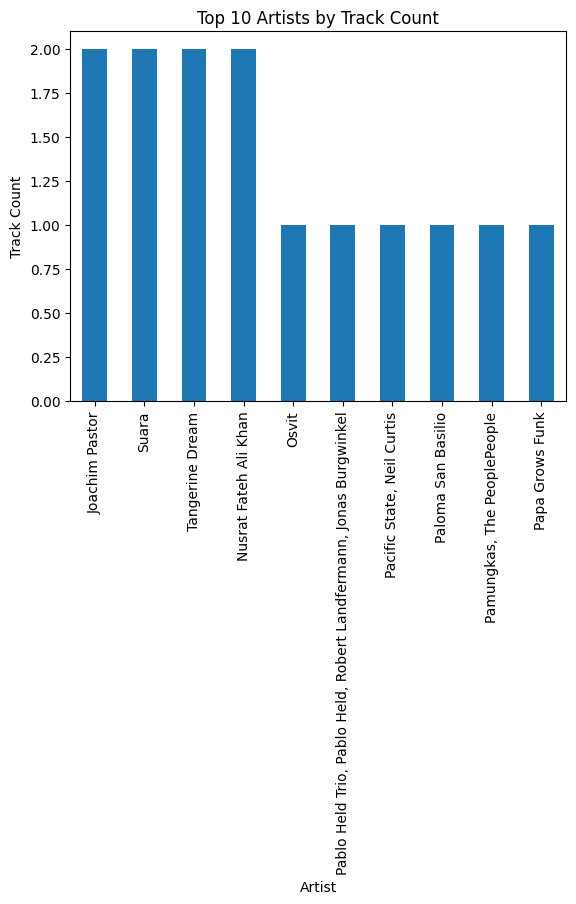

In [24]:
import matplotlib.pyplot as plt

top10 = artist_counts.head(10)

top10.plot(kind='bar')
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Artist")
plt.ylabel("Track Count")
plt.show()

In [26]:
artist_counts = (
    df['Artists']
      .value_counts()
      .head(10)
)

artist_counts

,count
Artists,
Suara,2
Joachim Pastor,2
Tangerine Dream,2
Nusrat Fateh Ali Khan,2
The Life Journey,1
El Búho,1
Planetself,1
BLUEBETTO,1
Paul Wilbur,1


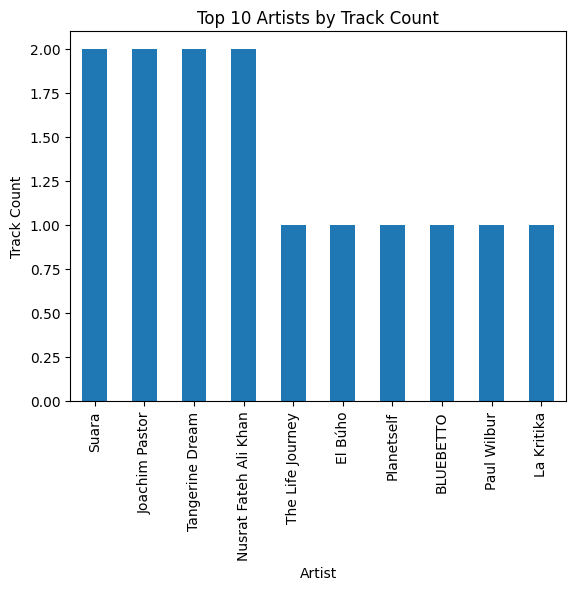

In [27]:
import matplotlib.pyplot as plt

artist_counts.plot(kind='bar')
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Artist")
plt.ylabel("Track Count")
plt.show()
